In [30]:
import pandas as pd 
pd.options.display.float_format = "{:,.2f}".format
receita = pd.read_pickle('receita_final.pkl')
display(receita.head())

,Nome completo,Cargo Base,Cargo em Comissão,Remuneração do Mês,Demais Elementos da Remuneração,Remuneração Bruta,Unidade,Jornada,Data
0,ADENIZE CONRADO DOS SANTOS,,ASSESSOR,"2,546.86",923.46,"3,470.32",GABINETE DO PREFEITO,40 H,01-2017
1,ADILSON TRAJAI,ASSISTENTE DE GESTAO DE POLITICAS PUBLICAS NIV...,NaN,"2,707.60","1,030.84","3,738.44",GABINETE DO PREFEITO,40 H,01-2017
2,ADRIANA CHAHIN CAROPRESO,,ASSISTENTE TECNICO II,"3,077.73","1,036.06","4,113.79",SECRETARIA DO GOVERNO MUNICIPAL,40 H,01-2017
3,ALBERTINA FLORENTINO DE SOUZA,AGENTE DE APOIO NIVEL I,ASSISTENTE TECNICO I,"2,090.47",771.46,"2,861.93",SECRETARIA DO GOVERNO MUNICIPAL,40 H,01-2017
4,ALEXANDRA ELIAS,,ENCARREGADO DE EQUIPE I,"1,306.82",899.23,"2,206.05",SECRETARIA DO GOVERNO MUNICIPAL,40 H,01-2017


In [32]:
#converte para datetime
receita['Data'] = pd.to_datetime(receita['Data'])
#converte para float e ignora os valores fora do padrão
receita['Remuneração Bruta'] = pd.to_numeric(receita['Remuneração Bruta'], errors = 'coerce')
#exibe as primeira 5 linhas do dataframe
display(receita.head())
#exibe as informações de nome de colunas e seus tipos do dataframe
receita.info()

C:\Users\brito\AppData\Local\Temp\ipykernel_4264\3735989664.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  receita['Data'] = pd.to_datetime(receita['Data'])


,Nome completo,Cargo Base,Cargo em Comissão,Remuneração do Mês,Demais Elementos da Remuneração,Remuneração Bruta,Unidade,Jornada,Data
0,ADENIZE CONRADO DOS SANTOS,,ASSESSOR,"2,546.86",923.46,"3,470.32",GABINETE DO PREFEITO,40 H,2017-01-01
1,ADILSON TRAJAI,ASSISTENTE DE GESTAO DE POLITICAS PUBLICAS NIV...,NaN,"2,707.60","1,030.84","3,738.44",GABINETE DO PREFEITO,40 H,2017-01-01
2,ADRIANA CHAHIN CAROPRESO,,ASSISTENTE TECNICO II,"3,077.73","1,036.06","4,113.79",SECRETARIA DO GOVERNO MUNICIPAL,40 H,2017-01-01
3,ALBERTINA FLORENTINO DE SOUZA,AGENTE DE APOIO NIVEL I,ASSISTENTE TECNICO I,"2,090.47",771.46,"2,861.93",SECRETARIA DO GOVERNO MUNICIPAL,40 H,2017-01-01
4,ALEXANDRA ELIAS,,ENCARREGADO DE EQUIPE I,"1,306.82",899.23,"2,206.05",SECRETARIA DO GOVERNO MUNICIPAL,40 H,2017-01-01


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10131413 entries, 0 to 10131412
Data columns (total 9 columns):
 #   Column                           Dtype         
---  ------                           -----         
 0   Nome completo                    object        
 1   Cargo Base                       object        
 2   Cargo em Comissão                object        
 3   Remuneração do Mês               object        
 4   Demais Elementos da Remuneração  object        
 5   Remuneração Bruta                float64       
 6   Unidade                          object        
 7   Jornada                          object        
 8   Data                             datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 695.7+ MB


In [34]:
#faz o agrupamento POR ANO e retorna a media por ano
remuneracao_bruta_ano = receita.groupby(receita['Data'].dt.year)['Remuneração Bruta'].mean().reset_index()
#exibe o dataframe completo
display(remuneracao_bruta_ano)

,Data,Remuneração Bruta
0,2017,"7,116.58"
1,2018,"7,819.06"
2,2019,"8,317.66"
3,2020,"8,179.54"
4,2021,"8,179.54"
5,2022,"10,811.69"
6,2023,"11,797.38"


In [36]:
#dicionario da inflação
inflacao_anual  = {'2017':2.95,'2018':3.75,'2019':4.31,'2020':4.52,'2021':10.06,'2022':5.79,'2023':4.62}
#inserindo as inflações condizentes ao seus anos
remuneracao_bruta_ano['Inflação'] = inflacao_anual.values()
#exibindo dataframe
display(remuneracao_bruta_ano)

,Data,Remuneração Bruta,Inflação
0,2017,"7,116.58",2.95
1,2018,"7,819.06",3.75
2,2019,"8,317.66",4.31
3,2020,"8,179.54",4.52
4,2021,"8,179.54",10.06
5,2022,"10,811.69",5.79
6,2023,"11,797.38",4.62


In [38]:
#calcula a porcentagem entre rmuneração bruta e retorna a numeração ajustada
remuneracao_bruta_ano['Remuneração Ajustada'] =  remuneracao_bruta_ano['Remuneração Bruta'] / (1 + remuneracao_bruta_ano['Inflação'] / 100)
#renomeia a coluna para ano
remuneracao_bruta_ano.rename(columns = {'Data':'Ano'}, inplace = True)
#exibe dataframe
display(remuneracao_bruta_ano)

,Ano,Remuneração Bruta,Inflação,Remuneração Ajustada
0,2017,"7,116.58",2.95,"6,912.65"
1,2018,"7,819.06",3.75,"7,536.44"
2,2019,"8,317.66",4.31,"7,973.98"
3,2020,"8,179.54",4.52,"7,825.82"
4,2021,"8,179.54",10.06,"7,431.89"
5,2022,"10,811.69",5.79,"10,219.95"
6,2023,"11,797.38",4.62,"11,276.41"


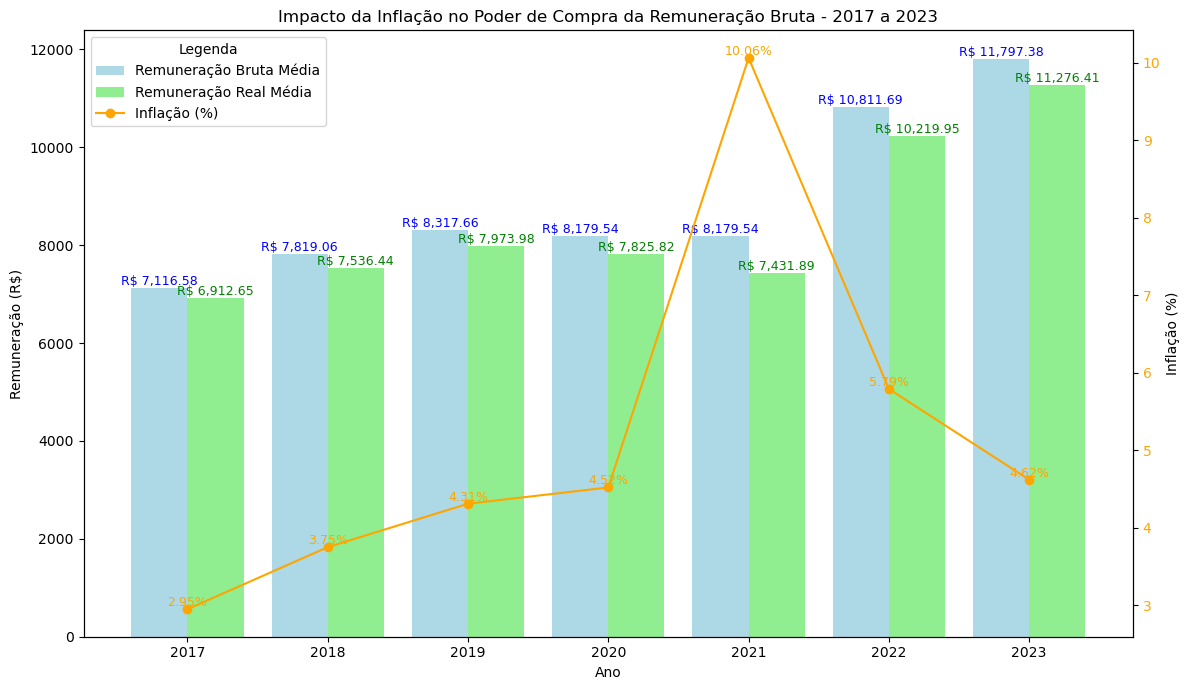

In [72]:
fig, ax1 = plt.subplots(figsize=(12, 7))

# Gráfico de barras para Média Remuneração Bruta e Remuneração Real
bars1 = ax1.bar(remuneracao_bruta_ano['Ano'] - 0.2, remuneracao_bruta_ano['Remuneração Bruta'], width=0.4, color='lightblue', label='Remuneração Bruta Média')
bars2 = ax1.bar(remuneracao_bruta_ano['Ano'] + 0.2, remuneracao_bruta_ano['Remuneração Ajustada'], width=0.4, color='lightgreen', label='Remuneração Real Média')
ax1.set_xlabel('Ano')
ax1.set_ylabel('Remuneração (R$)')
ax1.tick_params(axis='y')

# Segundo eixo para a Inflação
ax2 = ax1.twinx()
line, = ax2.plot(remuneracao_bruta_ano['Ano'], remuneracao_bruta_ano['Inflação'], color='orange', marker='o', label='Inflação (%)')
ax2.set_ylabel('Inflação (%)')
ax2.tick_params(axis='y', labelcolor='orange')

# Adicionar rótulos nas barras
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height, f'R$ {height:,.2f}', ha='center', va='bottom', color='blue', fontsize=9)
for bar in bars2:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height, f'R$ {height:,.2f}', ha='center', va='bottom', color='green', fontsize=9)

# Rótulos de inflação
for i, inflacao in enumerate(remuneracao_bruta_ano['Inflação']):
    ax2.text(remuneracao_bruta_ano['Ano'][i], inflacao, f'{inflacao:.2f}%', color='orange', ha='center', va='bottom', fontsize=9)

# Combinar legendas
handles1, labels1 = ax1.get_legend_handles_labels()  # Captura legendas do ax1 (barras)
handles2, labels2 = ax2.get_legend_handles_labels()  # Captura legenda do ax2 (linha de inflação)
handles = handles1 + [line]  # Adiciona a linha de inflação às barras
labels = labels1 + ['Inflação (%)']  # Adiciona o label de inflação
ax1.legend(handles, labels, loc='upper left', title='Legenda')  # Define a legenda combinada no gráfico principal com título

# Título e layout
plt.title('Impacto da Inflação no Poder de Compra da Remuneração Bruta - 2017 a 2023')
fig.tight_layout()
plt.show()

In [76]:
#salvar o grafico em png
fig.savefig('grafico_remuneracao_inflacao.png', bbox_inches='tight')

# Ou salvar em formato PDF
fig.savefig('grafico_remuneracao_inflacao.pdf', bbox_inches='tight')